## 0. DEPENDENCIES

In [8]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
DATA_DIR = r"C:\Users\Amith_Kumar2\OneDrive - Dell Technologies\Desktop\PROJECTS\data\raw\braintumor"
TRAIN_DIR = os.path.join(DATA_DIR, "Training")
TEST_DIR = os.path.join(DATA_DIR, "Testing")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42


## 1. DATA INGESTION

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

class_names

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


['glioma', 'meningioma', 'notumor', 'pituitary']

## 2. EDA

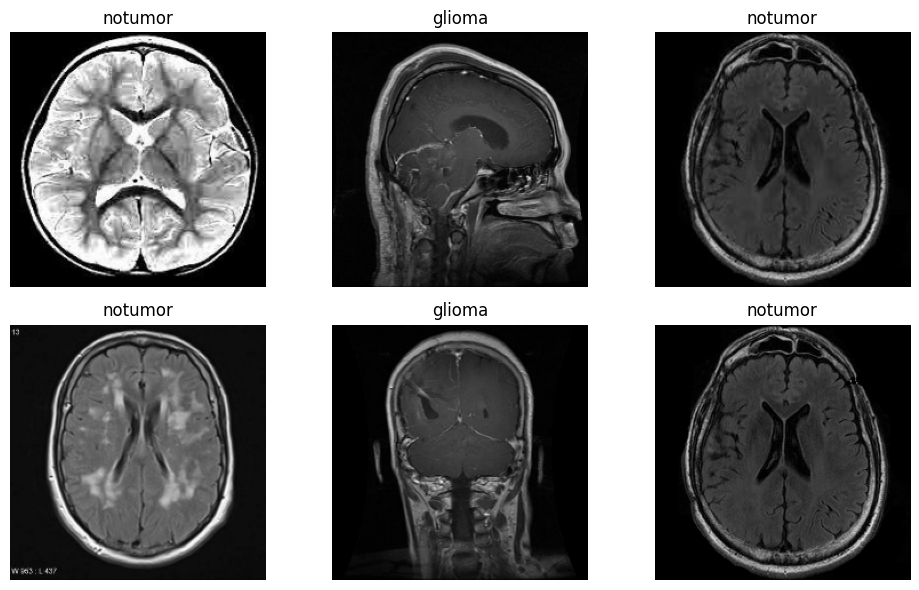

In [11]:
plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()


## 3. DATA PROCESSING

In [12]:
normalization = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization(x), y))
test_ds = test_ds.map(lambda x, y: (normalization(x), y))

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)


## 4. MODEL TRAINING

In [13]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation="relu", input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


c:\Users\Amith_Kumar2\OneDrive - Dell Technologies\Desktop\PROJECTS\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 70s 382ms/step - accuracy: 0.7213 - loss: 0.6955 - val_accuracy: 0.6934 - val_loss: 0.7778
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 337ms/step - accuracy: 0.8822 - loss: 0.3167 - val_accuracy: 0.9047 - val_loss: 0.2665
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 377ms/step - accuracy: 0.9417 - loss: 0.1605 - val_accuracy: 0.9359 - val_loss: 0.1933
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 414ms/step - accuracy: 0.9722 - loss: 0.0852 - val_accuracy: 0.9268 - val_loss: 0.1977
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 444ms/step - accuracy: 0.9828 - loss: 0.0526 - val_accuracy: 0.9527 - val_loss: 0.1527
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 449ms/step - accuracy: 0.9823 - loss: 0.0527 - val_accuracy: 0.9443 - val_loss: 0.1813
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9451 - val_loss: 0.2079
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 468ms/step - accuracy: 0.9963 - loss: 0

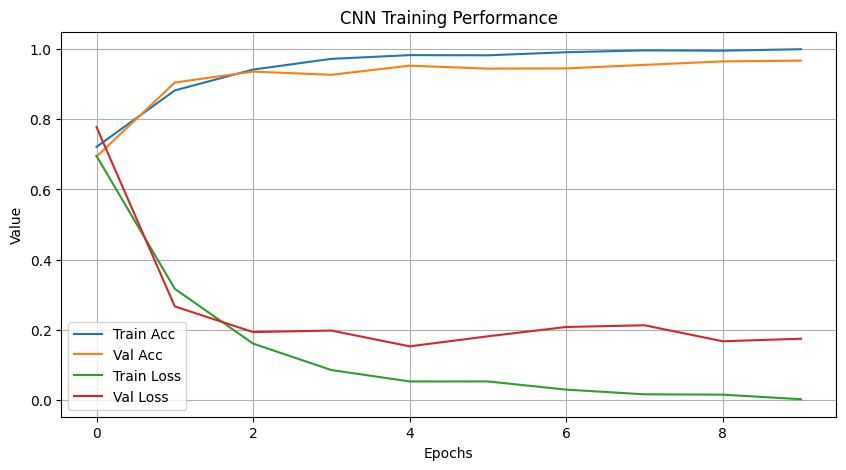

In [15]:
plt.figure(figsize=(10,5))

plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")

plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("CNN Training Performance")
plt.legend()
plt.grid(True)
plt.show()


## 5. MODEL EVALUATION

In [16]:
y_true, y_pred = [], []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


              precision    recall  f1-score   support

      glioma       0.95      0.97      0.96       300
  meningioma       0.97      0.89      0.93       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.96      1.00      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



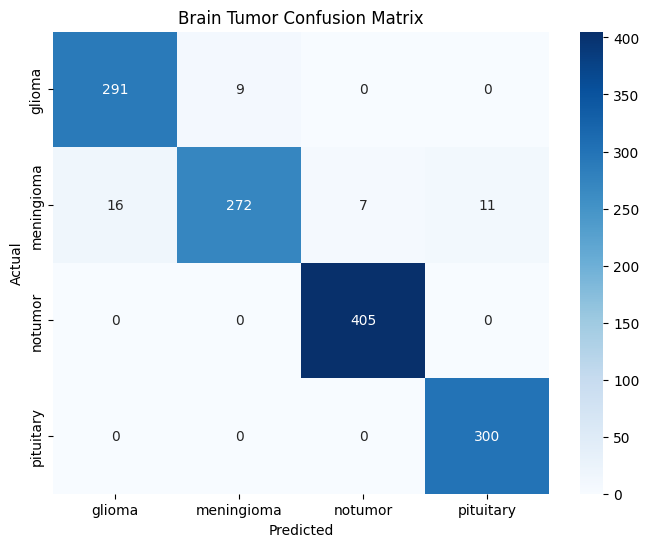

In [18]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Brain Tumor Confusion Matrix")
plt.show()


## 6. MODEL INFERENCE